<a href="https://colab.research.google.com/github/prathameshhire/Happiness-Prediction/blob/main/Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [ ]:
data = pd.read_csv('happiness_data.csv')

# Question A

## Answers



1) How much data is present?

-> 1949 rows including column names and 11 columns

2) What attributes/features are continuous valued?

-> Continuous


* Life Ladder (happiness score)
* Log GDP per capita
* Social support
* Healthy life expectancy at birth
* Freedom to make life choices
* Generosity
* Perceptions of corruption
* Positive affect
* Negative affect

-> Categorical
* Year
* Country

3) Data Summary

-> [In Code Cell below]

## Code

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Get a statistical summary of the numerical columns
data_summary = data.describe(include='all')

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\nStatistical Summary:")
print(data_summary)

Number of rows: 1949
Number of columns: 11

Statistical Summary:
       Country name         year  Life Ladder  Log GDP per capita  \
count          1949  1949.000000  1949.000000         1913.000000   
unique          166          NaN          NaN                 NaN   
top        Zimbabwe          NaN          NaN                 NaN   
freq             15          NaN          NaN                 NaN   
mean            NaN  2013.216008     5.466705            9.368453   
std             NaN     4.166828     1.115711            1.154084   
min             NaN  2005.000000     2.375000            6.635000   
25%             NaN  2010.000000     4.640000            8.464000   
50%             NaN  2013.000000     5.386000            9.460000   
75%             NaN  2017.000000     6.283000           10.353000   
max             NaN  2020.000000     8.019000           11.648000   

        Social support  Healthy life expectancy at birth  \
count      1936.000000                       1

# Question B

## Answers



1) Explain noticeable traits for key attributes

* Year: The data spans from 2005 to 2020, with a mean year of 2013.
* Life Ladder: This is likely the main happiness score.
  1. Range: 2.375 to 8.019
  2. Mean: 5.467
  3. Distribution: Roughly normal, slightly right-skewed
* Log GDP per capita:
  1. Range: 6.635 to 11.648
  2. Mean: 9.368
  3. Distribution: Bimodal, suggesting two distinct groups of countries
* Social support:
  1. Range: 0.29 to 0.987
  2. Mean: 0.813
  3. Distribution: Left-skewed, with most countries having high social support
* Healthy life expectancy at birth:
  1. Range: 32.3 to 77.1 years
  2. Mean: 63.359 years
  3. Distribution: Slightly left-skewed
* Freedom to make life choices:
  1. Range: 0.258 to 0.985
  2. Mean: 0.743
  3. Distribution: Left-skewed, most countries have high freedom scores
* Generosity:
  1. Range: -0.335 to 0.698
  2. Mean: 0.000103
  3. Distribution: Roughly normal, centered around zero
* Perceptions of corruption:
  1. Range: 0.035 to 0.983
  2. Mean: 0.747
  3. Distribution: Left-skewed, most countries have high corruption perception
* Positive affect:
  1. Range: 0.322 to 0.944
  2. Mean: 0.710
  3. Distribution: Left-skewed
* Negative affect:
  1. Range: 0.083 to 0.705
  2. Mean: 0.269
  3. Distribution: Right-skewed, most countries have low negative affect

2) Are there any attributes that might require special treatment? If so, what special treatment might they require?

->  Several attributes have missing values, which might require special treatment:
* Perceptions of corruption: 110 missing values
* Generosity: 89 missing values
* Healthy life expectancy at birth: 55 missing values
* Log GDP per capita: 36 missing values

These missing values should be addressed through imputation techniques or by carefully considering their impact on analyses.

author ~ askadam:

for column 'year':

*   Noticeable Traits:
The data is relatively uniform from 2006 - 2018, having similar density for each year. There is a spike in 2020, hence an outlier.

*   Special Treatments:
Data normalisation required as outlier present in the 2020.

For column 'Life Ladder': Happiness score
*   Noticeable Traits:
Almost normal distribution which has center around 5 and is slightly skewed to the right.

*   Special Treatments:
No special treatments required.

For column 'Log GDP per capita': Market values of goods and services in a country
*   Noticeable Traits:
Bimodal distribution with peaks as 9 and 11.
*   Special Treatments:
Clustering analysis can be useful for distinguishing between two distinct groups within the distribution and used for noise reduction.

For column 'Social support': How people feel they are supported by those around them
*   Noticeable Traits:
Data is left skewed with majority values between 0.8 to 1.0
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Healthy life expectancy at birth': Rank of the country based on the happiness score
Data is left skewed with peak value in 65
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Freedom to make life choices': How much freedom contributes to one's feeling of happiness
*   Noticeable Traits:
Left-skewed distribution with a peak around 0.8
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Generosity': Reflects whether people have donated money
*   Noticeable Traits:
Right-skewed distribution, most values in 0 to 0.1.
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Perceptions of corruption': How people perceive the presence of corruption
*   Noticeable Traits:
Data is left skewed with majority values between 0.8 to 1.0
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Positive affect': Feelings of happiness, laughter, and enjoyment
*   Noticeable Traits:
Data is left skewed with majority values between 0.7 to 0.9
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

For column 'Negative affect': Feelings of worry, anger, or sadness
*   Noticeable Traits:
Data is right skewed with majority values between 0.1 to 0.3
*   Special Treatments:
Logarithmic or Square root transformations required to normalise the distribution if required.

Several attributes have missing values, which might require special treatment:

Perceptions of corruption: 110 missing values
Generosity: 89 missing values
Healthy life expectancy at birth: 55 missing values
Log GDP per capita: 36 missing values
These missing values should be addressed through imputation techniques or by carefully considering their impact on analyses.

## Code

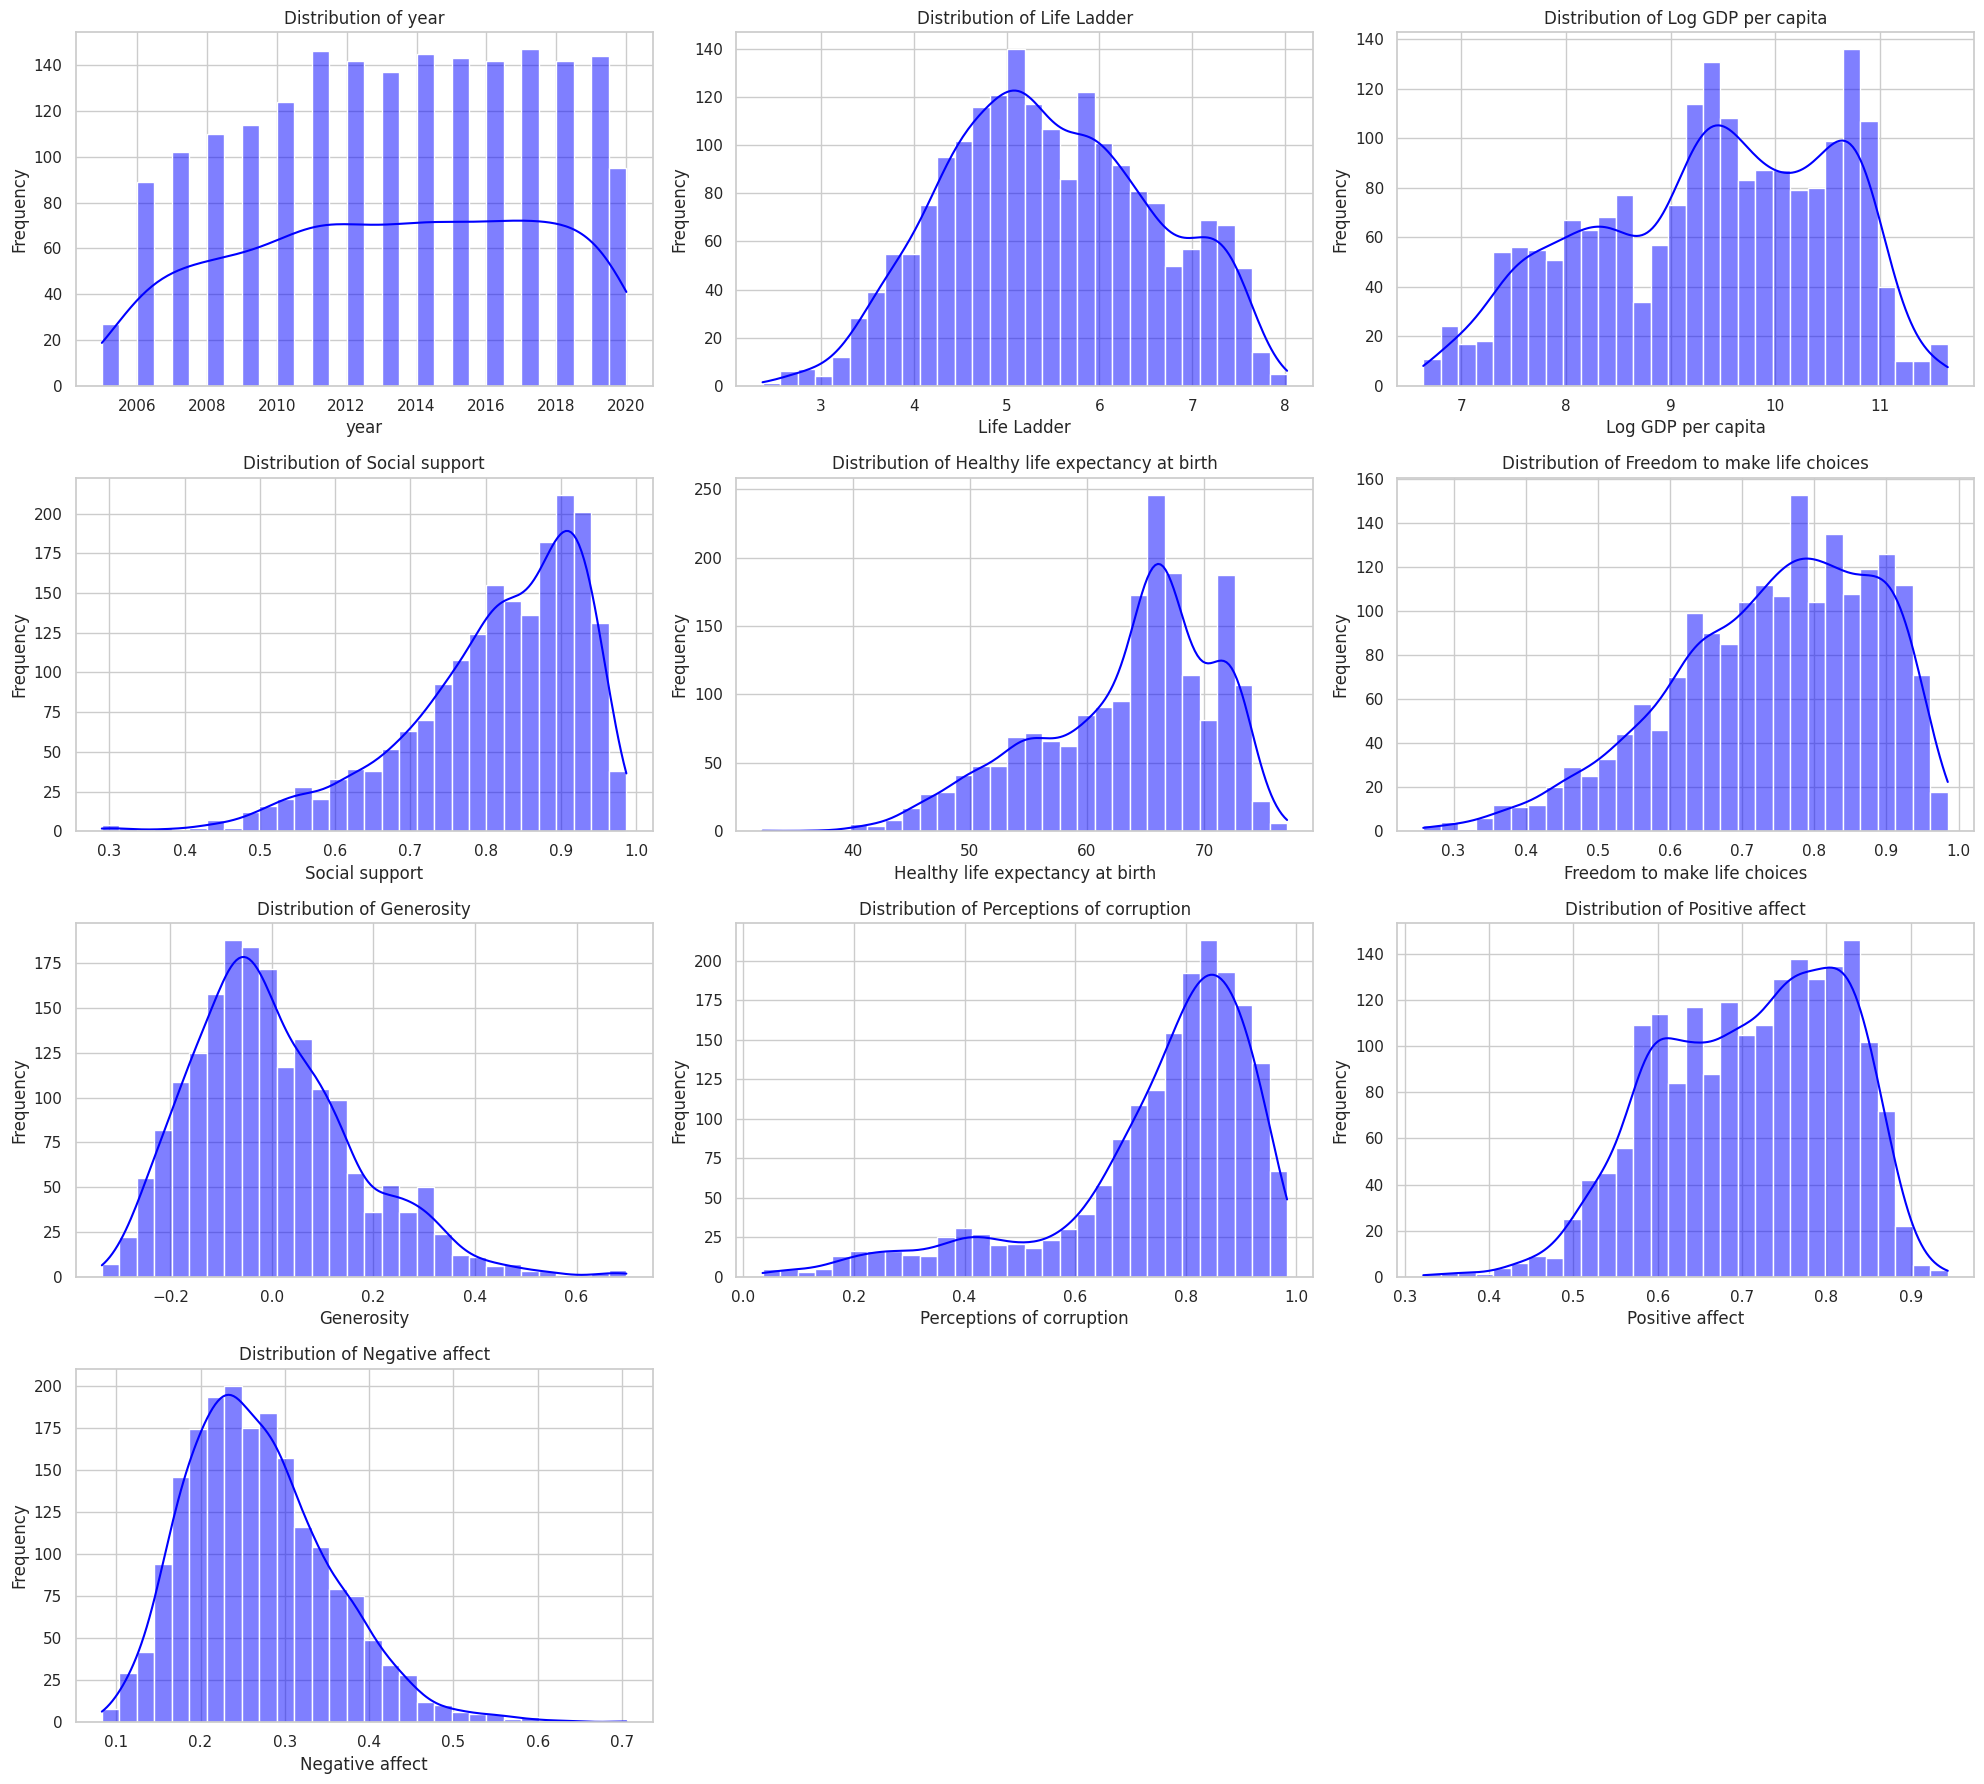

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of columns to plot
columns = data.columns[1:]  # Exclude 'Country name'

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Loop through each column and create a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Question C

author ~ askadam

# Answer

Life Ladder is considered as the label.
Scatter plot has been made considering relationship between life ladder and attributes.

Pearson correlation between Log GDP per capita and Life Ladder: 0.79 

Pearson correlation between Social support and Life Ladder: 0.71 

Pearson correlation between Healthy life expectancy at birth and Life Ladder: 0.75 

Pearson correlation between Freedom to make life choices and Life Ladder: 0.53 

Pearson correlation between Generosity and Life Ladder: 0.18 

Pearson correlation between Perceptions of corruption and Life Ladder: -0.45 

Pearson correlation between Positive affect and Life Ladder: 0.53 

Pearson correlation between Negative affect and Life Ladder: -0.30 



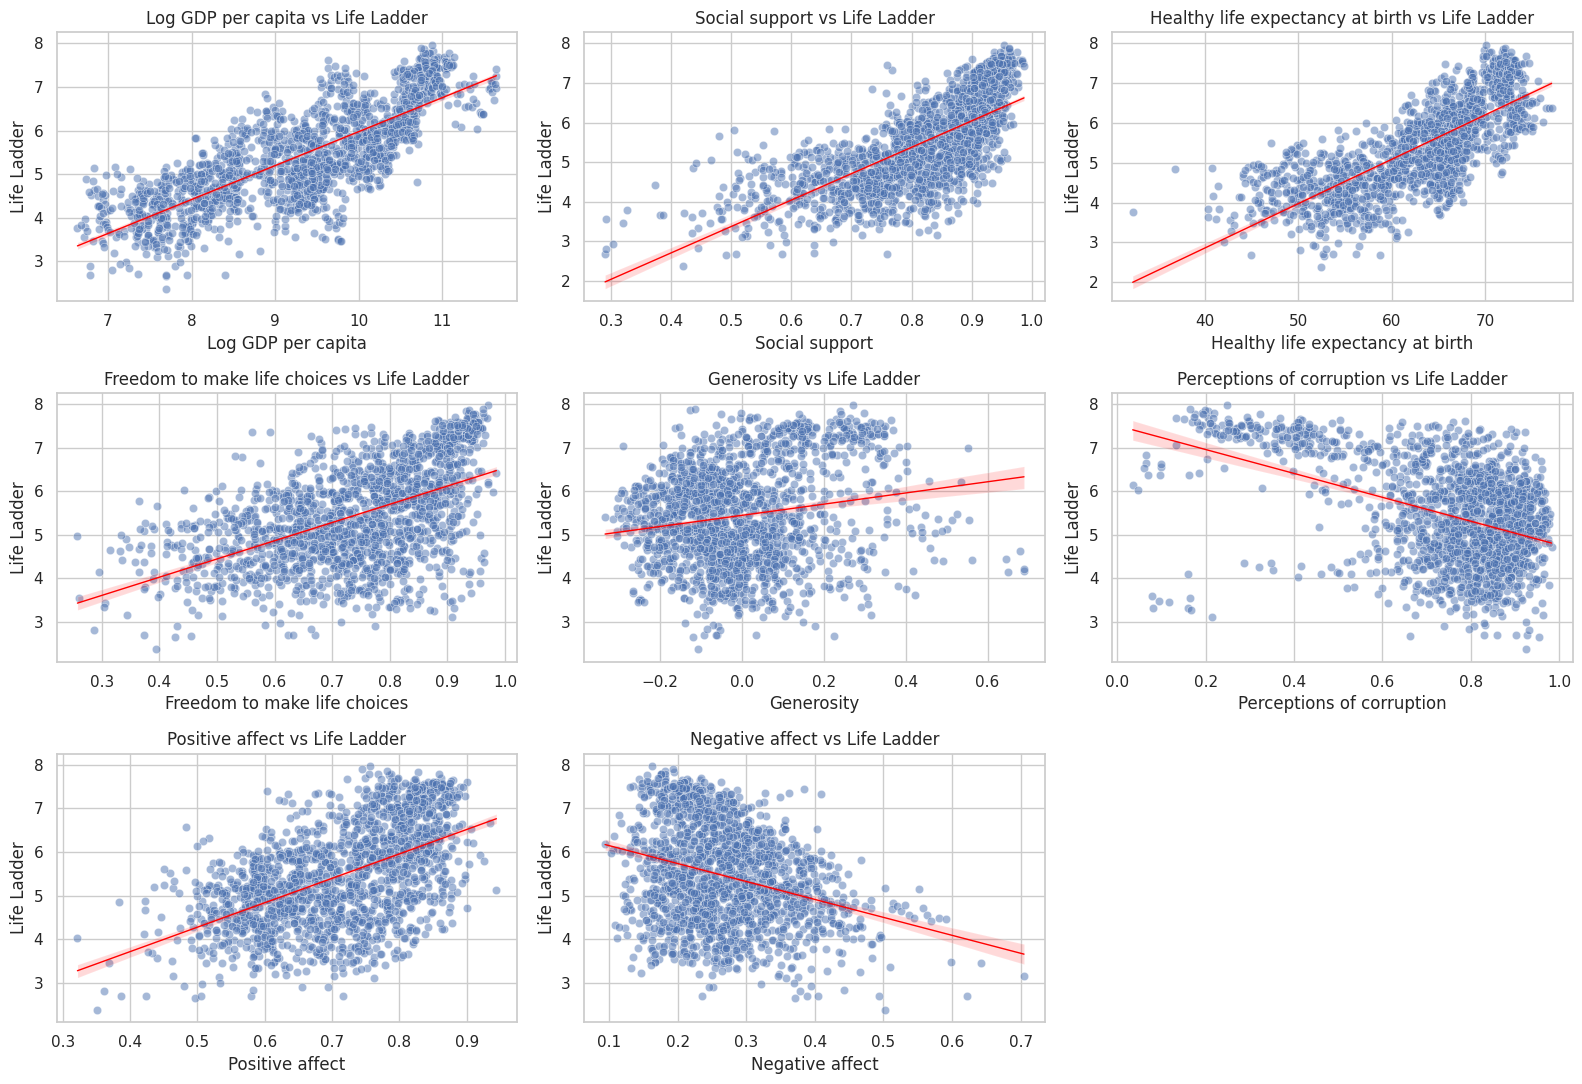

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

attributes = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect'
]

# missing values check
data = data.dropna(subset=['Life Ladder'] + attributes)
data[attributes + ['Life Ladder']] = data[attributes + ['Life Ladder']].apply(pd.to_numeric, errors='coerce')

for attribute in attributes:
    if data[attribute].isnull().any() or data['Life Ladder'].isnull().any():
        print(f'Cannot calculate PCC for {attribute} due to missing values.')
    else:
        corr, _ = pearsonr(data[attribute], data['Life Ladder'])
        print(f'Pearson correlation between {attribute} and Life Ladder: {corr:.2f} \n')

sns.set(style="whitegrid")

plt.figure(figsize=(16, 11))

for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=data[attribute], y=data['Life Ladder'], alpha=0.5)
    sns.regplot(x=data[attribute], y=data['Life Ladder'], scatter=False, color='red', line_kws={"linewidth":1})
    plt.title(f'{attribute} vs Life Ladder')
    plt.xlabel(attribute)
    plt.ylabel('Life Ladder')

plt.tight_layout()
plt.show()

# Question D

author ~ askadam